In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

q1

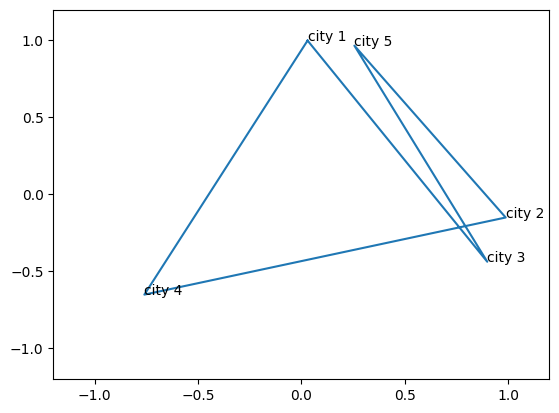

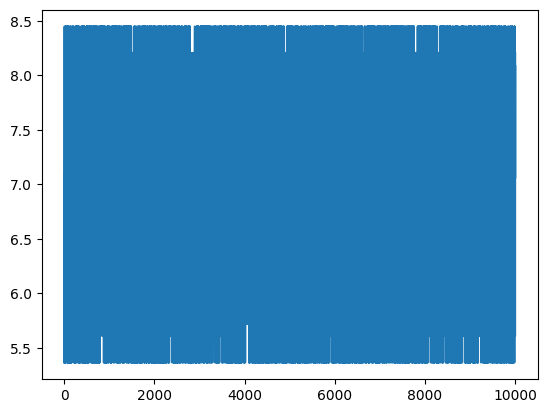

In [85]:
def getT(k):
    return -np.log(k+1)

def permute(x):
    n = x.shape[0]
    y = x.copy()
    idx1 = int(np.random.randint(1, n-1))
    idx2 = int(np.random.randint(1, n-1))
    while idx1 == idx2:
        idx2 = int(np.random.randint(1, n-1))
    t = y[idx1]
    y[idx1] = y[idx2]
    y[idx2] = t
    return y

def calculate_distances(x, positions):
    res = 0
    for i in range(1, x.shape[0]):
        res += np.linalg.norm(positions[int(x[i] - 1)] - positions[int(x[i-1] - 1)])
    return res


def tsm(n, positions):
    x = np.empty(n+1)
    x[0] = 1
    x_middle = np.arange(2,n+1)
    np.random.shuffle(x_middle)
    x[1:n] = x_middle
    x[n] = 1

    best_path = x.copy()
    best_cost = calculate_distances(x, positions)

    cost_list = [best_cost]
    ks = 0.0001
    for iter in range(10000):

        T = getT(ks)
        y = permute(x)
        x  = y
        costx = calculate_distances(x, positions)
        costy = calculate_distances(y, positions)
        if costy < costx:
            best_path = y.copy()
            best_cost = costy
            x = y.copy()
        
        p = np.exp(-(costy - costx)/T)
        u = np.random.uniform(0,1)
        if u < p:
            best_path = y.copy()
            best_cost = costy
            x = y.copy()

        cost_list.append(best_cost)
        ks = ks+0.0001

    return best_cost, best_path, cost_list

theta = np.random.uniform(0, 2*np.pi, size = 10)
sin = np.sin(theta)
cos = np.cos(theta)
positions = np.vstack([sin, cos]).T
cost, path, list = tsm(5, positions)
for i in range(5):
    plt.annotate('city {}'.format(i+1), (positions[i,0], positions[i,1]))
plt.plot(positions[np.array(path - 1, dtype=int), 0], positions[np.array(path - 1, dtype=int), 1])
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])

plt.show()
plt.plot(list)

